In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [42]:
data = pd.read_csv('1.csv')

In [43]:
data.shape

(768, 10)

<AxesSubplot:>

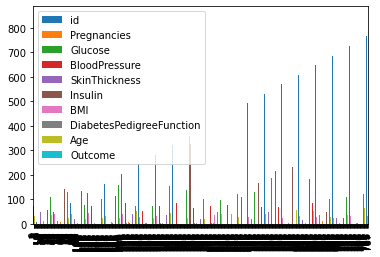

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

# a simple line plot
data.plot(kind='bar')


In [19]:
data.head()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [20]:
sampled_df = data[(data['id'] % 10) == 0]
sampled_df.shape

(76, 10)

In [21]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,76.0,385.000000,220.831761,10.000,197.500,385.000,572.5000,760.00
Pregnancies,76.0,3.671053,3.247104,0.000,1.000,3.000,6.0000,17.00
Glucose,76.0,124.223684,34.376581,0.000,105.000,116.000,144.5000,197.00
BloodPressure,76.0,71.657895,20.575424,0.000,66.000,74.000,82.0000,110.00
SkinThickness,76.0,21.026316,18.262511,0.000,0.000,24.000,31.2500,99.00
Insulin,76.0,83.118421,109.829197,0.000,0.000,48.500,144.0000,579.00
BMI,76.0,31.248684,8.692533,0.000,26.050,31.250,36.5750,49.70
DiabetesPedigreeFunction,76.0,0.452737,0.319028,0.085,0.215,0.336,0.6635,1.39
Age,76.0,36.171053,14.105685,21.000,25.000,31.000,43.5000,81.00
Outcome,76.0,0.460526,0.501751,0.000,0.000,0.000,1.0000,1.00


In [22]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
        'BMI','DiabetesPedigreeFunction','Age']

In [23]:
select_df = sampled_df[features]

In [24]:
select_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [25]:
select_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
9,8,125,96,0,0,0.0,0.232,54
19,1,115,70,30,96,34.6,0.529,32
29,5,117,92,0,0,34.1,0.337,38
39,4,111,72,47,207,37.1,1.390,56
49,7,105,0,0,0,0.0,0.305,24
...,...,...,...,...,...,...,...,...
719,5,97,76,27,0,35.6,0.378,52
729,2,92,52,0,0,30.1,0.141,22
739,1,102,74,0,0,39.5,0.293,42
749,6,162,62,0,0,24.3,0.178,50


In [26]:
X = StandardScaler().fit_transform(select_df)
X

array([[ 1.34203016,  0.02273275,  1.19092801, -1.1589878 , -0.76182574,
        -3.61877471, -0.69650117,  1.27235319],
       [-0.82806116, -0.27009585, -0.08111185,  0.49463684,  0.11806671,
         0.38810136,  0.24063667, -0.29766492],
       [ 0.41199102, -0.21153013,  0.99522957, -1.1589878 , -0.76182574,
         0.33019853, -0.36518981,  0.13052184],
       [ 0.10197798, -0.38722729,  0.01673737,  1.43169081,  1.13544235,
         0.67761553,  2.9573898 ,  1.41508211],
       [ 1.03201711, -0.56292445, -3.50583455, -1.1589878 , -0.76182574,
        -3.61877471, -0.46616089, -0.86858059],
       [-1.13807421, -0.56292445, -0.37465951,  1.10096588,  0.53968184,
         1.18716046, -0.8826666 , -1.01130951],
       [ 0.10197798,  0.6376728 ,  0.6527573 ,  0.32927438,  0.15472889,
        -0.27199094, -0.83218106, -0.65448722],
       [-0.51804812, -0.35794443, -0.27681029,  0.05367027, -0.76182574,
        -0.72363304, -0.4598502 , -0.86858059],
       [-0.82806116, -0.50435873

In [27]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(n_clusters=12)


In [28]:
centers = model.cluster_centers_
centers

array([[ 0.41199102, -0.17248632,  0.40813425, -1.1589878 , -0.76182574,
         1.02889272,  1.29241876, -0.34524122],
       [-0.60922842, -0.44579301, -0.1357923 , -0.29002426, -0.35476765,
        -0.64120666, -0.59905665, -0.79721613],
       [ 1.07076874,  1.23065071,  0.4448277 ,  0.72890033,  0.04817942,
         0.4011295 ,  0.16017534, -0.03004819],
       [-0.44054485, -0.39454801, -3.50583455, -1.1589878 , -0.76182574,
        -1.27370996, -0.61761751, -0.77937502],
       [ 0.76629164, -0.05256604,  0.54791885, -0.59990518, -0.25641133,
        -1.13722471,  0.2316214 ,  1.92482825],
       [ 1.18702363,  0.25699562,  0.11458659,  0.908043  ,  0.87422428,
         0.45758476,  2.8990159 ,  1.23667096],
       [-0.28553833,  0.90853925, -0.13003646,  0.78402116,  2.60880392,
         0.62839812,  0.05920426, -0.54744053],
       [-0.47929648, -0.60684874,  0.12681774,  0.41884571,  0.71153583,
         0.23176371,  1.44045709, -0.61880499],
       [ 0.90801189,  1.73870833

In [29]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [30]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [31]:
P = pd_centers(features, centers)
P

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,prediction
0,0.411991,-0.172486,0.408134,-1.158988,-0.761826,1.028893,1.292419,-0.345241,0
1,-0.609228,-0.445793,-0.135792,-0.290024,-0.354768,-0.641207,-0.599057,-0.797216,1
2,1.070769,1.230651,0.444828,0.728900,0.048179,0.401129,0.160175,-0.030048,2
3,-0.440545,-0.394548,-3.505835,-1.158988,-0.761826,-1.273710,-0.617618,-0.779375,3
4,0.766292,-0.052566,0.547919,-0.599905,-0.256411,-1.137225,0.231621,1.924828,4
5,1.187024,0.256996,0.114587,0.908043,0.874224,0.457585,2.899016,1.236671,5
6,-0.285538,0.908539,-0.130036,0.784021,2.608804,0.628398,0.059204,-0.547441,6
7,-0.479296,-0.606849,0.126818,0.418846,0.711536,0.231764,1.440457,-0.618805,7
8,0.908012,1.738708,0.368995,-1.158988,-0.761826,-0.160818,-0.502763,1.457901,8
9,-0.518048,2.131099,-0.081112,4.297974,-0.761826,0.399682,0.385783,1.843269,9


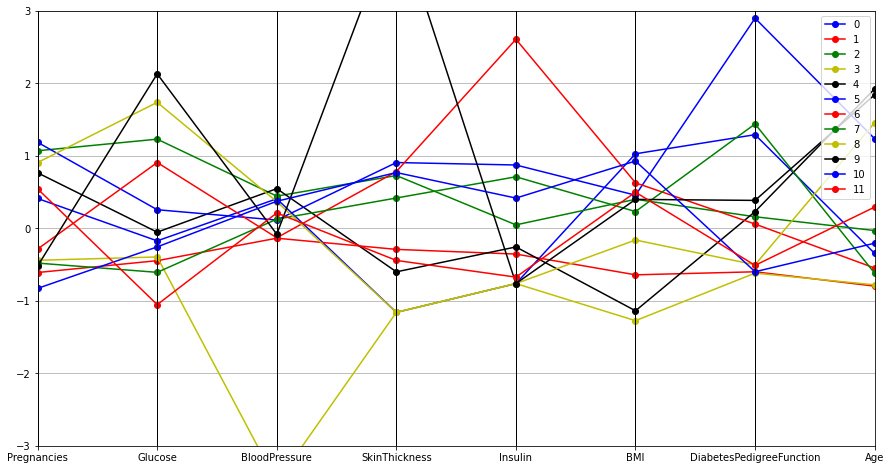

In [32]:
parallel_plot(P[P['Glucose'] < 80])

In [33]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline


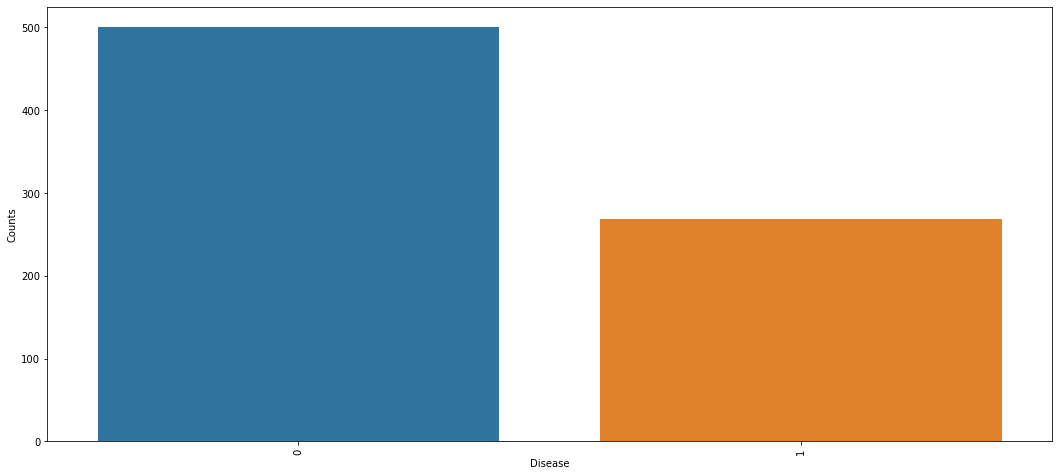

In [34]:
# Reading the train.csv by removing the
# last column since it's an empty column
DATA_PATH = "1.csv"
data = pd.read_csv(DATA_PATH).dropna(axis = 1)
 
# Checking whether the dataset is balanced or not
disease_counts = data["Outcome"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
 
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='col', ylabel='values'>

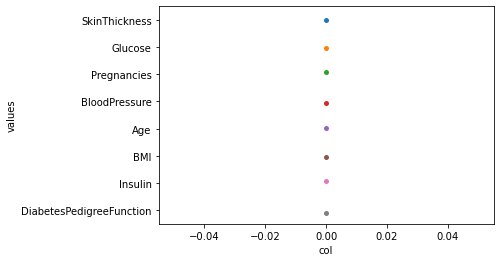

In [35]:
wine_desc = pd.DataFrame({'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
        'BMI','DiabetesPedigreeFunction','Age'})
wine_desc.replace(0, np.nan, inplace=True)
df = pd.DataFrame([(colname, wine_desc[colname][i]) for i in range(len(wine_desc)) for colname in wine_desc.columns], 
                 columns=['col', 'values'])

sns.stripplot(x = 'col', y='values', data=df)

In [40]:
# form dataframe
import matplotlib.pyplot as mp
from pandas import DataFrame
data = df.head()
  
df = pd.DataFrame(data, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
        'BMI','DiabetesPedigreeFunction','Age'])
  
# plot the dataframe
df.plot(x="Name", y="User Rating", kind="bar", figsize=(9, 8))
  
# print bar graph
mp.show()

KeyError: 'Name'

In [39]:
df2 = DataFrame(np.random.rand(10, 4), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
        'BMI','DiabetesPedigreeFunction','Age'])

df2.plot(kind='bar');

ValueError: Shape of passed values is (10, 4), indices imply (10, 8)